In [1]:
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [19]:
# Create a video of images in ./saves
# The video will be saved as ./out.mp4
# The images are named as 1.png,.., 153.png


def create_video():
    img_array = []
    for i in tqdm(range(1, 154)):
        filename = f"./saves/{i}.png"
        img = cv2.imread(filename)
        height, width, layers = img.shape
        size = (width, height)
        img_array.append(img)

    out = cv2.VideoWriter('out.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 20, size)

    for i in range(len(img_array)):
        out.write(img_array[i])
    out.release()

In [20]:
create_video()

100%|██████████| 153/153 [00:00<00:00, 615.06it/s]


In [3]:
lines_coords = [[[0., 54.16, 0.], [16.5, 54.16, 0.]],
                [[16.5, 13.84, 0.], [16.5, 54.16, 0.]],
                [[16.5, 13.84, 0.], [0., 13.84, 0.]],
                [[88.5, 54.16, 0.], [105., 54.16, 0.]],
                [[88.5, 13.84, 0.], [88.5, 54.16, 0.]],
                [[88.5, 13.84, 0.], [105., 13.84, 0.]],
                [[0., 37.66, -2.44], [0., 30.34, -2.44]],
                [[0., 37.66, 0.], [0., 37.66, -2.44]],
                [[0., 30.34, 0.], [0., 30.34, -2.44]],
                [[105., 37.66, -2.44], [105., 30.34, -2.44]],
                [[105., 30.34, 0.], [105., 30.34, -2.44]],
                [[105., 37.66, 0.], [105., 37.66, -2.44]],
                [[52.5, 0., 0.], [52.5, 68, 0.]],
                [[0., 68., 0.], [105., 68., 0.]],
                [[0., 0., 0.], [0., 68., 0.]],
                [[105., 0., 0.], [105., 68., 0.]],
                [[0., 0., 0.], [105., 0., 0.]],
                [[0., 43.16, 0.], [5.5, 43.16, 0.]],
                [[5.5, 43.16, 0.], [5.5, 24.84, 0.]],
                [[5.5, 24.84, 0.], [0., 24.84, 0.]],
                [[99.5, 43.16, 0.], [105., 43.16, 0.]],
                [[99.5, 43.16, 0.], [99.5, 24.84, 0.]],
                [[99.5, 24.84, 0.], [105., 24.84, 0.]]]

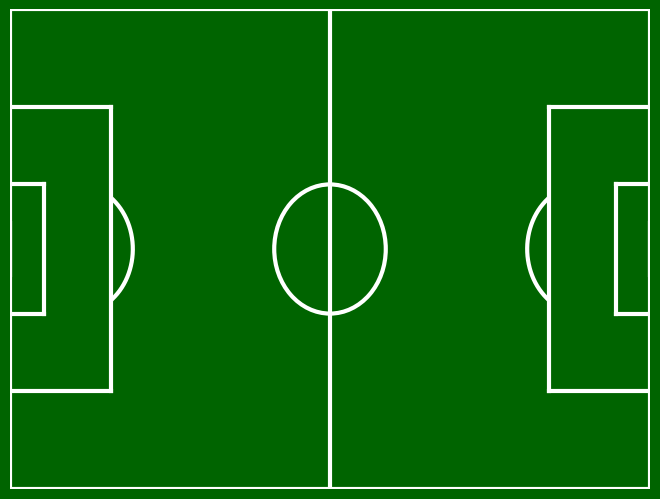

In [8]:
fig, ax = plt.subplots()

for line in lines_coords:
    x1, y1, _ = line[0]
    x2, y2, _ = line[1]

    ax.plot([x1, x2], [y1, y2], 'white', lw=3)

ax.add_artist(plt.Circle((105/2, 68/2), 9.15, color='white', fill=False, lw=3))

points_l = []
for ang in np.linspace(219, 321, 200):
    ang = np.deg2rad(ang)
    point = [94 + 9.15*np.sin(ang), 68/2 + 9.15*np.cos(ang)]
    # Plot the arc
    points_l.append(point)
ax.plot([x for x, _ in points_l], [y for _, y in points_l], 'white', lw=3)

points_r = []
for ang in np.linspace(39, 141, 200):
    ang = np.deg2rad(ang)
    point = [11 + 9.15*np.sin(ang), 68/2 + 9.15*np.cos(ang)]
    # Plot the arc
    points_r.append(point)
ax.plot([x for x, _ in points_r], [y for _, y in points_r], 'white', lw=3)


ax.set_xlim(0, 105)
ax.set_ylim(0, 68)
ax.invert_yaxis()
ax.axis('off')
plt.tight_layout(pad=0)
fig.patch.set_facecolor('darkgreen')



In [13]:
fig.canvas.draw()
w, h = fig.canvas.get_width_height()
print(w, h)
buf = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
buf.shape = (h, w, 3)
buf = np.flipud(buf)
cv2.imwrite('field.png', buf)

640 480


/tmp/ipykernel_31046/1111100875.py:4: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  buf = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)


True